<a href="https://colab.research.google.com/github/4vm/drug-review-project/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Project 💊

###Motivação 💪

O nosso projeto tem como base o dataset publicado no (https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29) que contem dados de medicamentos usados mundialemte.
Nesse projeto apresentamos um conjunto de tabelas divididas em Visualização, Limpeza e Modelo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('always')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/local/lib/python3.7/dist-packages/lightgbm/__init__.py:30: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>



-----------

###Visualização 📖 🔍

Dataset: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

Aqui Na área de visualização, teremos os comandos para a leitura do dataset e o gráfico de 20 doenças e a quantidade de medicamentos para elas, e no outro teremos 20 doenças e 1 medicamento por doença.

Lendo os datasets

In [ ]:
df_train = pd.read_csv("/content/train.csv", delimiter="\t", parse_dates=["date"])
df_test = pd.read_csv("/content/test.csv", delimiter="\t", parse_dates=["date"]) #, error_bad_lines=False

Linhas | Colunas

In [ ]:
print("train.csv (linhas|colunas):" ,df_train.shape)
print("test.csv (linhas|colunas):", df_test.shape)

train.csv (linhas|colunas): (161297, 7)
test.csv (linhas|colunas): (53766, 7)


In [ ]:
df_train.head()

,id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [ ]:
df_test.head()

,id,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4


Significado das colunas
* id: id
* drugName: Nome do remédio.
* condition: Doença.
* review: Análise/comentário.
* rating: Nota dada ao remédio pelo paciente que escreveu o review.
* date: Data do review.
* usefulCount: Quantidade de usuarios que acharam o review útil.

Funcionamento: O usuario escreve um comentario/análise do medicamento utilizado, em seguida avalia de 0-10 conforme o grau de satisfação em relação ao medicamento. A medida que outros usuarios consideram o comentario/análise útil, eles podem marcar como útil e o campo usefulCount cresce em +1.

Concatenação do df_train e df_test para analisar os dados

In [ ]:
df_all = pd.concat([df_train,df_test])

Gráfico Top 20 - Número de remédios por doença(condition)

Text(0.5, 1.0, 'Top 20 - Número de remédios por doença(condition).')

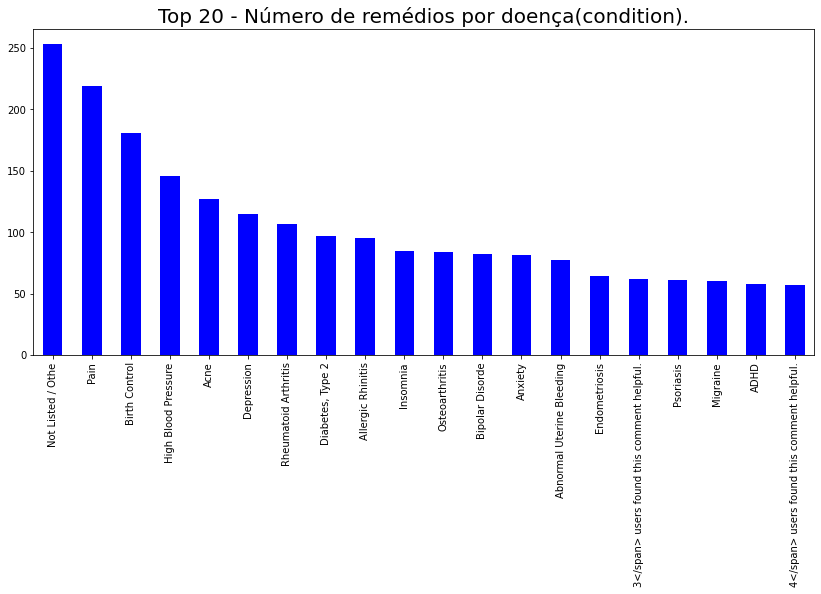

In [ ]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20 - Número de remédios por doença(condition).", fontsize = 20)

A frase "3</span> users found this comment helpful." trata-se de um erro e deve ser removido. Outros números também aparecem no lugar do "3" modificando a frase.

In [ ]:
df_all[df_all['condition']=='1</span> users found this comment helpful.'].head()

,id,drugName,condition,review,rating,date,usefulCount
678,80302,Alavert D-12 Hour Allergy and Sinus,1</span> users found this comment helpful.,"""I&#039;ve found this product helps to shrink ...",5.0,2016-04-15,1
1882,230590,Depo-Provera,1</span> users found this comment helpful.,"""I got my first (and last) Depo shot about two...",1.0,2011-10-25,1
3716,147589,Aviane,1</span> users found this comment helpful.,"""I just started using Avaine about a 2 weeks a...",7.0,2010-09-29,1
8464,6194,Minastrin 24 Fe,1</span> users found this comment helpful.,"""I started taking birth control when I was 15 ...",8.0,2015-04-19,1
15645,33641,Microgestin Fe 1 / 20,1</span> users found this comment helpful.,"""Very tender but increasingly larger breasts. ...",8.0,2011-12-10,1


No campo 'review', há erros como '&# 039;' que significa um apóstrofo e palavras em letras maiúsculas. Entre outros erros.

In [ ]:
df_test['review'][1]

'"My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."'

Apenas um remédio por doença (top 20).

Text(0.5, 1.0, 'Bottom 20 - Número de remédios por doença(condition)')

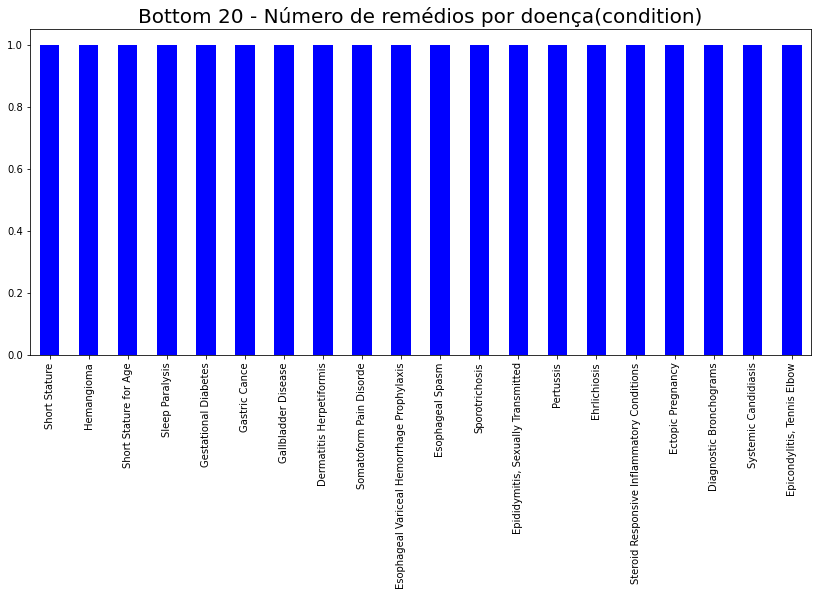

In [ ]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom 20 - Número de remédios por doença(condition)", fontsize = 20)

Nuvem de palavras

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

/usr/local/lib/python3.6/dist-packages/wordcloud/wordcloud.py:30: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>



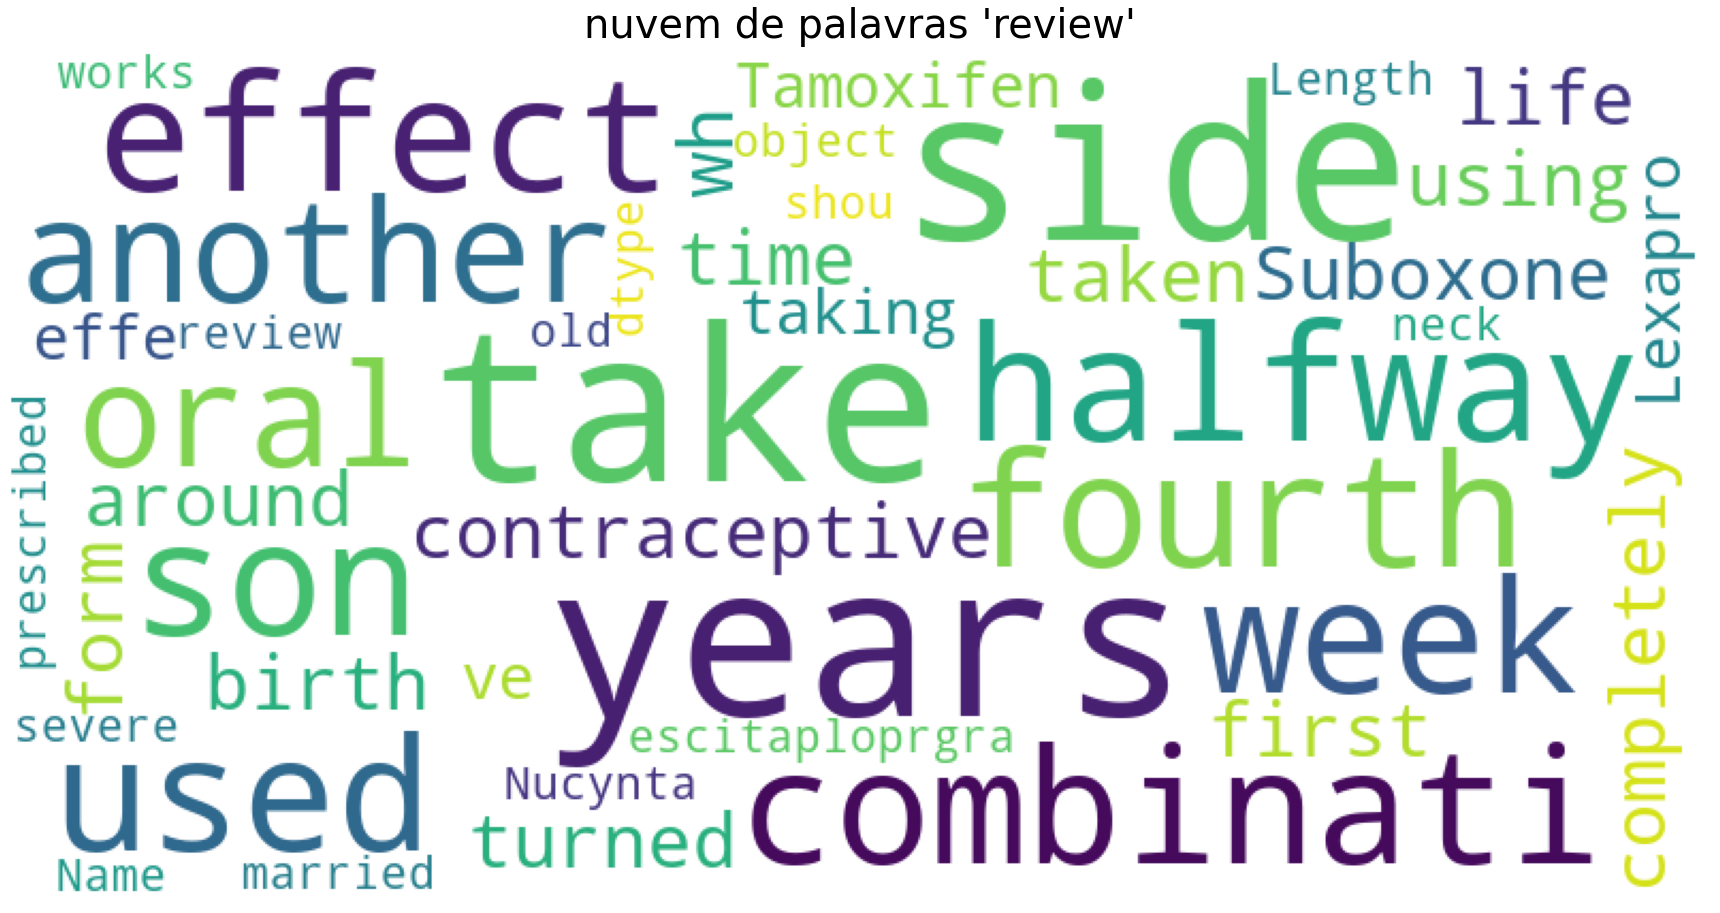

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_all["review"], title="nuvem de palavras 'review'")

Ratings de 1 - 5 serão classificado como negativo. Ratings de 6 - 10 serão classificado como positivo.

In [ ]:
from collections import defaultdict
df_all_6_10 = df_all[df_all["rating"]>5]
df_all_1_5 = df_all[df_all["rating"]<6]

In [ ]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from rating  8 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 review ##
freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [ ]:
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')


Quantidade de análises por ano.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



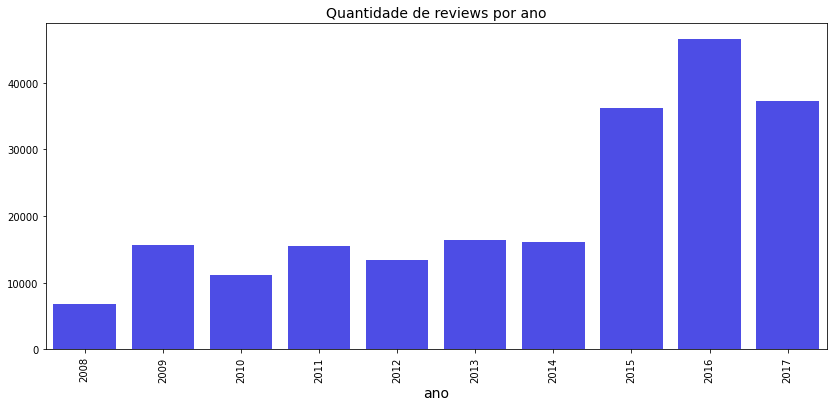

In [ ]:
cnt_srs = df_all['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('ano', fontsize=14)
plt.ylabel('', fontsize=12)
plt.title("Quantidade de reviews por ano", fontsize = 14)
plt.show()

Média de rating por ano

Text(0.5, 1.0, "Média do 'rating' por ano")

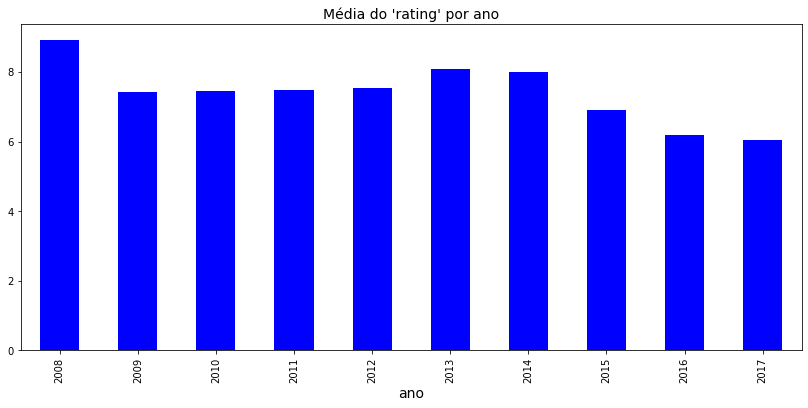

In [ ]:
df_all['year'] = df_all['date'].dt.year
rating = df_all.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("ano", fontsize = 14)
plt.ylabel("", fontsize = 14)
plt.title("Média do 'rating' por ano", fontsize = 14)

Quantidade acumulada de reviews por mês

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



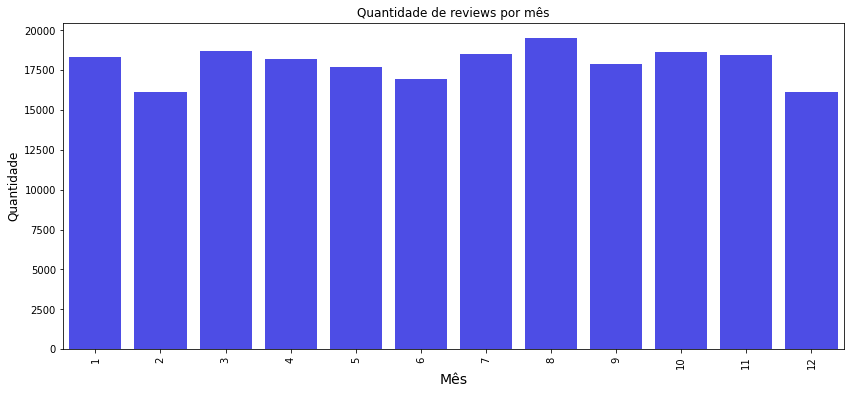

In [ ]:
cnt_srs = df_all['date'].dt.month.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Quantidade', fontsize=12)
plt.title("Quantidade de reviews por mês")
plt.show()

Contagem total de notas dadas.

Text(0.5, 1.0, 'Quantidade de notas(0-10)')

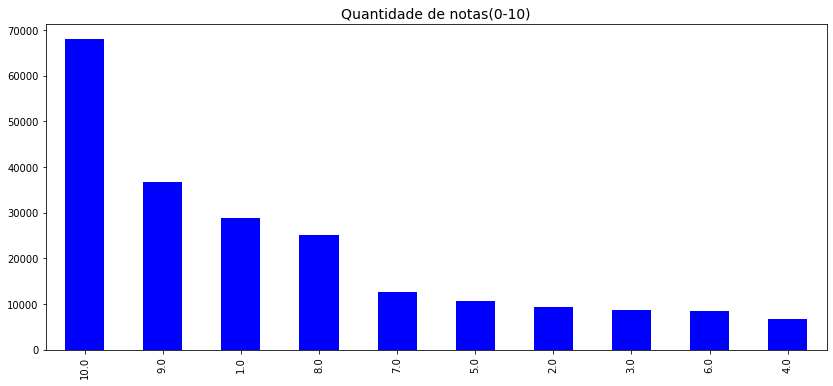

In [ ]:
rating = df_all['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Quantidade de notas(0-10)", fontsize = 14)

Top 20 rémedios mais populares

In [ ]:
df_all['drugName'].value_counts().nlargest(20)


Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Citalopram                            1308
Medroxyprogesterone                   1308
Duloxetine                            1256
Lexapro                               1250
Bupropion / naltrexone                1249
Name: drugName, dtype: int64

Estatitica descritiva 'usefulCount'

In [ ]:
df_all["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

Estatitica descritiva 'rating'

In [ ]:
df_all["rating"].describe()

count    215063.000000
mean          6.990008
std           3.275554
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

-----------

###Limpeza 🧹

Missing values

In [ ]:
df_all.isnull().sum()

id                0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
dtype: int64

Text(0.5, 1.0, 'Valores ausentes')

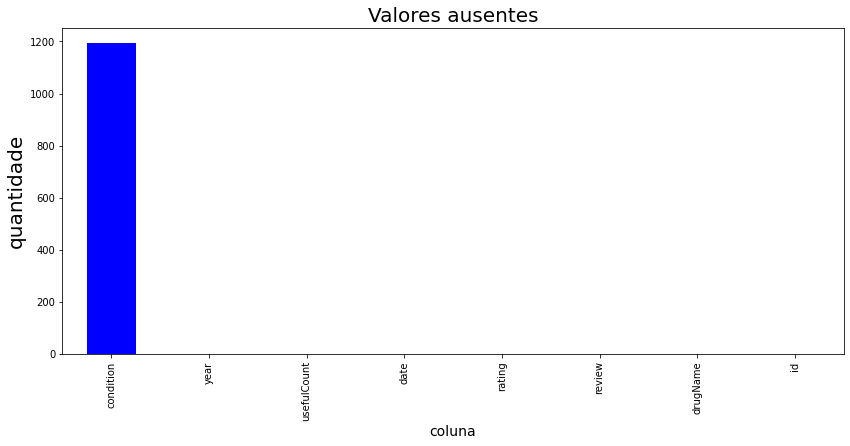

In [ ]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='blue')
plt.xlabel("coluna", fontsize = 14)
plt.ylabel("quantidade", fontsize = 20)
plt.title("Valores ausentes", fontsize = 20)

Porcentagem de valores ausentes

In [ ]:
print("Valores ausentes (%):", 1194/df_all.shape[0] *100)

Valores ausentes (%): 0.5551861547546533


Removendo missing values

In [ ]:
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

Após a remoção

Text(0.5, 1.0, 'Valores ausentes')

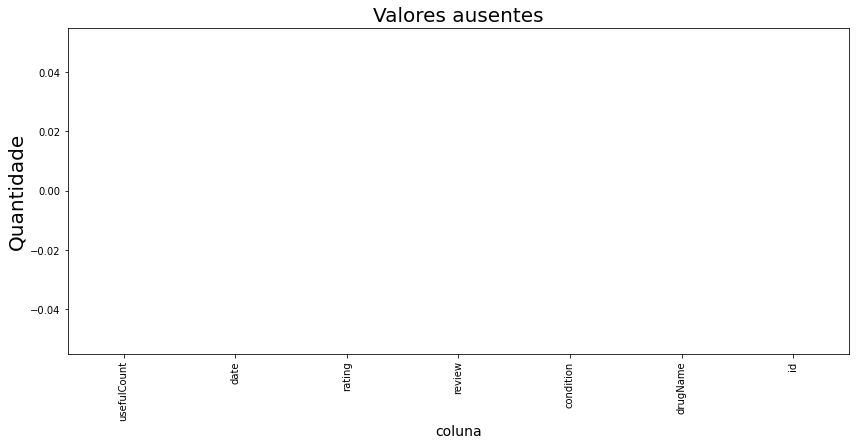

In [ ]:
df_all = pd.concat([df_train,df_test]).reset_index()
del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("coluna", fontsize = 14)
plt.ylabel("Quantidade", fontsize = 20)
plt.title("Valores ausentes", fontsize = 20)

In [ ]:
df_all.isnull().sum()

id             0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

Removendo frases que contenham "<span'>' na coluna 'condition'

In [ ]:
all_list = set(df_all.index)
span_list = []
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

In [ ]:
new_idx = all_list.difference(set(span_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

Removendo doenças que contéma apenas um remédio

In [ ]:
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(10)

,condition,drugName
826,Myotonia Congenita,1
827,Sepsis,1
828,ailure to Thrive,1
829,Hepatitis B Prevention,1
830,Transverse Myelitis,1
831,Tympanostomy Tube Placement Surgery,1
832,Muscle Twitching,1
833,Somatoform Pain Disorde,1
834,acial Lipoatrophy,1
835,Rabies Prophylaxis,1


In [ ]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
df_condition_1['condition'][0:10]

0                           Uveitis, Posteri
1                    Pseudogout, Prophylaxis
2                        Infectious Diarrhea
3                   Thyroid Suppression Test
4                                 Angioedema
5                                Scleroderma
6                                        mis
7            Anti NMDA Receptor Encephalitis
8                                     mist (
9    Pruritus of Partial Biliary Obstruction
Name: condition, dtype: object

In [ ]:
all_list = set(df_all.index)
condition_list = []
for i,j in enumerate(df_all['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

Removendo stopwords

In [ ]:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [ ]:
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lista de stopwords da lib

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning:

unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>



In [ ]:
stops = set(stopwords.words('english'))

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning:

unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>



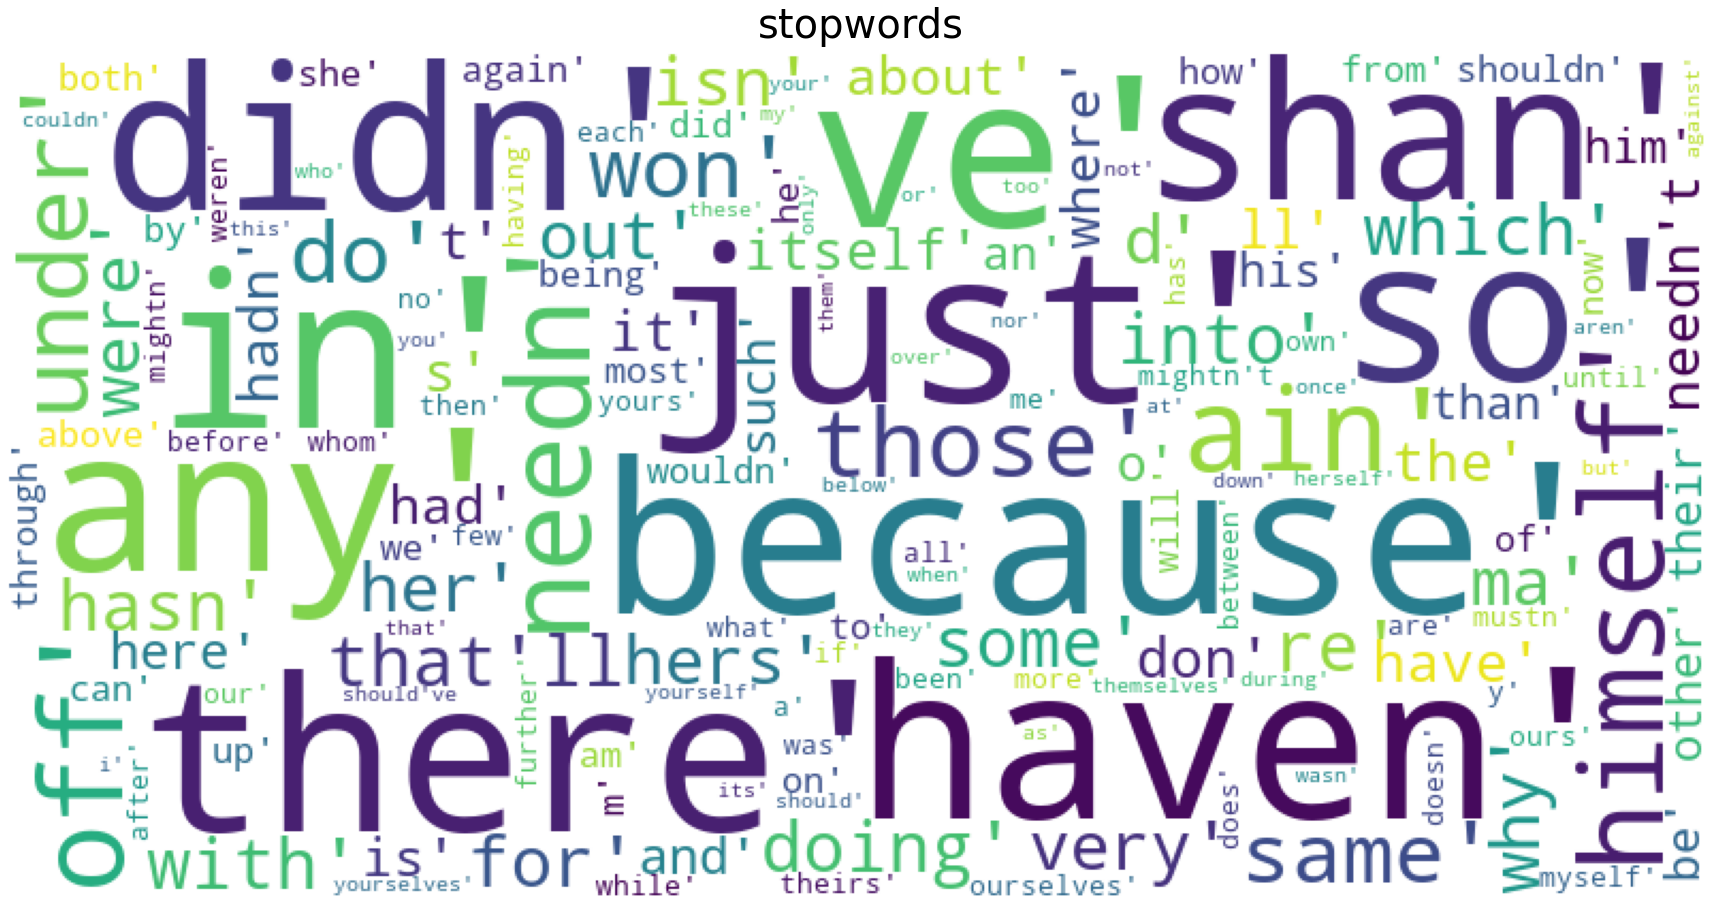

In [ ]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

#https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stops, title="stopwords")

Retirando palavras da lista de stopwords. Certas palavras são necessárias para a análise emocional.

In [ ]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [ ]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

Limpa o 'review'

In [ ]:
%time df_all['review_clean'] = df_all['review'].apply(review_to_words)

CPU times: user 2min 16s, sys: 340 ms, total: 2min 17s
Wall time: 2min 17s


---------

###Modelo 🦾🤖

atribuindo valor a 'sentiment'

In [ ]:
df_all['sentiment'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42) 

In [ ]:
# https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/tutorial-part-1.ipynb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(4, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
#https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [ ]:
%time train_data_features = pipeline.fit_transform(df_train['review_clean'])
%time test_data_features = pipeline.fit_transform(df_test['review_clean'])

CPU times: user 29.8 s, sys: 804 ms, total: 30.6 s
Wall time: 30.6 s
CPU times: user 16.2 s, sys: 226 ms, total: 16.4 s
Wall time: 16.4 s


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. Dataset
y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

# 2. Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               4000200   
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
activation_4 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
activation_5 (Activation)    (None, 300)              

In [ ]:
# 4. Train model
hist = model.fit(train_data_features, y_train, epochs=10, batch_size=64)

# 5. Traing process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. Evaluation
loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
sub_preds_deep = model.predict(test_data_features,batch_size=32)


InvalidArgumentError: ignored

ML

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['sentiment']
feats = ['usefulCount']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.570406	valid_1's binary_logloss: 0.572234
[200]	training's binary_logloss: 0.570206	valid_1's binary_logloss: 0.572221
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.570241	valid_1's binary_logloss: 0.572209


In [ ]:
solution = df_test['sentiment']
confusion_matrix(y_pred=sub_preds, y_true=solution)

array([[    0, 21009],
       [    0, 48969]])

In [ ]:
len_train = df_train.shape[0]
df_all = pd.concat([df_train,df_test])
del df_train, df_test;
gc.collect()

28513

Cria mais variaveis 

In [ ]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['day'] = df_all['date'].dt.day
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month

In [ ]:
from textblob import TextBlob
from tqdm import tqdm
reviews = df_all['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df_all["Predict_Sentiment"] = Predict_Sentiment
df_all.head()

100%|██████████| 212053/212053 [02:27<00:00, 1439.15it/s]


,id,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment
130185,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market ...",9.0,2010-11-26,102,tri near everi ssri market place pristiq impro...,1,26,2010,11,0.023958
155501,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a deca...",9.0,2008-05-03,39,take month clear decad long infect,1,3,2008,5,0.025000
75325,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went b...",2.0,2016-04-21,15,work awhil pretti well went back mayb get hour...,0,21,2016,4,-0.125000
19174,229747,Ketamine,Pain,"""I was given this after surgery for pain as I ...",1.0,2016-04-16,19,given surgeri pain morphin tri drug sort omg w...,0,16,2016,4,0.166667
209735,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month perio...",9.0,2016-12-16,5,abilifi serv well two month period antidepress...,1,16,2016,12,0.038889


In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["rating"])


array([[1.        , 0.25709864],
       [0.25709864, 1.        ]])

In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["sentiment"])


array([[1.        , 0.23518272],
       [0.23518272, 1.        ]])

In [ ]:
reviews = df_all['review']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df_all["Predict_Sentiment2"] = Predict_Sentiment
df_all.head()

100%|██████████| 212053/212053 [03:39<00:00, 965.14it/s]


,id,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment,Predict_Sentiment2
130185,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market ...",9.0,2010-11-26,102,tri near everi ssri market place pristiq impro...,1,26,2010,11,0.023958,0.093750
155501,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a deca...",9.0,2008-05-03,39,take month clear decad long infect,1,3,2008,5,0.025000,0.025000
75325,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went b...",2.0,2016-04-21,15,work awhil pretti well went back mayb get hour...,0,21,2016,4,-0.125000,-0.116667
19174,229747,Ketamine,Pain,"""I was given this after surgery for pain as I ...",1.0,2016-04-16,19,given surgeri pain morphin tri drug sort omg w...,0,16,2016,4,0.166667,-0.089286
209735,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month perio...",9.0,2016-12-16,5,abilifi serv well two month period antidepress...,1,16,2016,12,0.038889,-0.029167


In [ ]:
np.corrcoef(df_all["Predict_Sentiment2"], df_all["rating"])


array([[1.        , 0.34831261],
       [0.34831261, 1.        ]])

In [ ]:
np.corrcoef(df_all["Predict_Sentiment2"], df_all["sentiment"])


array([[1.        , 0.31714484],
       [0.31714484, 1.        ]])

In [ ]:
df_all['count_sent']=df_all["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

df_all['count_word']=df_all["review_clean"].apply(lambda x: len(str(x).split()))

df_all['count_unique_word']=df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

df_all['count_letters']=df_all["review_clean"].apply(lambda x: len(str(x)))

df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.



Dividindo o ano em quatro partes.

In [ ]:
df_all['season'] = df_all["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [ ]:
df_train = df_all[:len_train]
df_test = df_all[len_train:]

Classificação

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['sentiment']
feats = ['usefulCount','day','year','month','Predict_Sentiment','Predict_Sentiment2', 'count_sent',
 'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
 'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'season']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.481357	valid_1's binary_logloss: 0.495027
[200]	training's binary_logloss: 0.463159	valid_1's binary_logloss: 0.490049
[300]	training's binary_logloss: 0.447159	valid_1's binary_logloss: 0.485463
[400]	training's binary_logloss: 0.433163	valid_1's binary_logloss: 0.481482
[500]	training's binary_logloss: 0.420147	valid_1's binary_logloss: 0.477575
[600]	training's binary_logloss: 0.408108	valid_1's binary_logloss: 0.47429
[700]	training's binary_logloss: 0.396828	valid_1's binary_logloss: 0.470977
[800]	training's binary_logloss: 0.386768	valid_1's binary_logloss: 0.467815
[900]	training's binary_logloss: 0.376606	valid_1's binary_logloss: 0.464822
[1000]	training's binary_logloss: 0.366627	valid_1's binary_logloss: 0.462071
[1100]	training's binary_logloss: 0.357028	valid_1's binary_logloss: 0.459272
[1200]	training's binary_logloss: 0.347825	valid_1's binary_logloss: 0.456409
[1300]	trai

Matriz de confusão

In [ ]:
confusion_matrix(y_pred=sub_preds, y_true=solution)


array([[13688,  7321],
       [ 3682, 45287]])

Classifica as variaveis por importancia e plota o grafico.

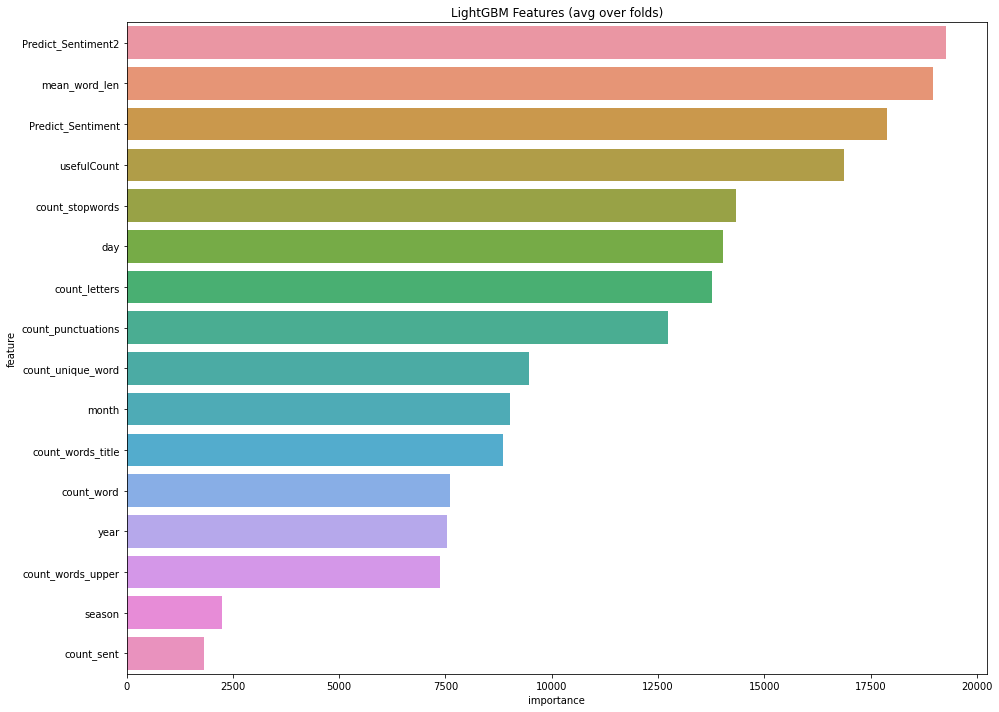

In [ ]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
df_all.head()

,id,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment,Predict_Sentiment2,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season
130185,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market ...",9.0,2010-11-26,102,tri near everi ssri market place pristiq impro...,1,26,2010,11,0.023958,0.093750,1,52,49,314,17,10,16,62,5.057692,3
155501,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a deca...",9.0,2008-05-03,39,take month clear decad long infect,1,3,2008,5,0.025000,0.025000,1,6,6,34,5,0,1,4,4.833333,1
75325,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went b...",2.0,2016-04-21,15,work awhil pretti well went back mayb get hour...,0,21,2016,4,-0.125000,-0.116667,1,21,19,121,4,1,2,18,4.809524,1
19174,229747,Ketamine,Pain,"""I was given this after surgery for pain as I ...",1.0,2016-04-16,19,given surgeri pain morphin tri drug sort omg w...,0,16,2016,4,0.166667,-0.089286,1,33,29,181,17,9,12,39,4.515152,1
209735,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month perio...",9.0,2016-12-16,5,abilifi serv well two month period antidepress...,1,16,2016,12,0.038889,-0.029167,1,60,48,376,12,9,17,62,5.283333,4
